## Praparing the project

Making needed Classes

In [1]:
# a simple implementation of DE algorithm

import numpy as np

In [2]:
class objective_function:
    # fun is the function definition
    # dim is the number of parameters
    # domains is the list of intervals [x_i_min, x_i_max] for each variable x_i
    def __init__(self, fun, dim, domains):
        self.fun = fun
        self.dim = dim
        self.domains = domains

    def __call__(self, x):
        return self.fun(x)


In [3]:
class differential_evolution:
    def __init__(self, objf, np, f, cr, max_gen):
        self.objf = objf
        self.np = np
        self.f = f
        self.cr = cr
        self.max_gen = max_gen
        
    def initialize(self):
        self.population = []
        self.values = []
        d = self.objf.dim
        
        for i in range(self.np):
            r = np.random.random(d)
            
            for j in range(d):
                l, u = self.objf.domains[j]
                r[j] = l + (u - l) * r[j]
            
            self.population.append(r)
            self.values.append(self.objf(r))

        self.best_f = 10e300
        self.find_best()
    
    def find_best(self):
        self.i_best = 0
        for i in range(1, self.np):
            if self.values[i] < self.values[self.i_best]:
                self.i_best = i

        if self.values[self.i_best] < self.best_f:
            self.best_f = self.values[self.i_best]
            self.best = self.population[self.i_best]
            print(f"Found new best with f={self.best_f}")

    def evolution(self):
        self.initialize()
        
        for g in range(1, (self.max_gen + 1)):
            mutants = self.differential_mutation()
            trials = self.crossover(mutants)
            self.selection(trials)
            self.find_best()
            
        return self.best_f, self.best

    def differential_mutation(self):
        mutants = []
        
        for i in range(self.np):
            # rand/1
            l = [j for j in range(self.np) if j != i]
            r1, r2, r3 = np.random.choice(l, 3, replace=False)
            m = self.population[r1] + self.f * (self.population[r2] - self.population[r3])
            mutants.append(m)
            
        return mutants
    
    def crossover(self, mutants):
        trials = []
        d = self.objf.dim
        
        for i in range(self.np):
            j_rand = np.random.randint(0, d)
            tr = np.zeros(d)
            
            for j in range(d):
                if np.random.random() < self.cr or j == j_rand:
                    tr[j] = mutants[i][j]
                else:
                    tr[j] = self.population[i][j]
            
            trials.append(tr)

        return trials
    
    def selection(self, trials):
        for i in range(self.np):
            fx = self.objf(trials[i])
            
            if fx < self.values[i]:
                self.population[i] = trials[i]
                self.values[i] = fx


## Running the project

### Shpere in 2D

The following objectif function is called **sphere**

In [4]:
objf = objective_function(lambda x: np.sqrt(x[0]**2 + x[1]**2), 2, [[-1,1], [-1,1]])


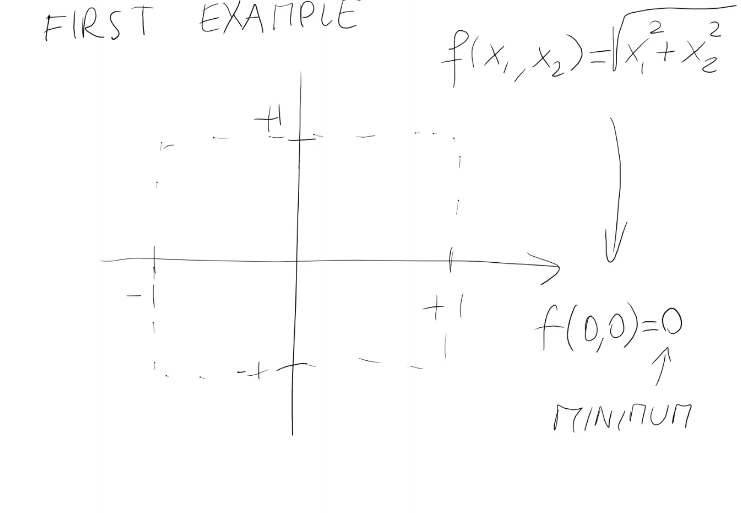

In [5]:
print(objf(np.array([1,1])))
print(objf(np.array([0,0])))


1.4142135623730951
0.0


In [6]:
differential_evolution(objf, 20, .9, 1, 50).evolution()


Found new best with f=0.19551604450793084
Found new best with f=0.12543591350938152
Found new best with f=0.09350193511000762
Found new best with f=0.0542239942693883
Found new best with f=0.03274113862627713
Found new best with f=0.025223483438644664
Found new best with f=0.011667162379974694
Found new best with f=0.008471772292773388
Found new best with f=0.004762616466683153
Found new best with f=0.0011194634298783165
Found new best with f=0.0010998748282879482
Found new best with f=0.00028916325502460316
Found new best with f=0.00025974486743021686
Found new best with f=1.9910328759210624e-05
Found new best with f=1.4372297248556397e-05


(1.4372297248556397e-05, array([-8.67209014e-06,  1.14611422e-05]))

In [7]:
differential_evolution(objf, 20, .9, 1, 100).evolution()


Found new best with f=0.15300105674319533
Found new best with f=0.12541573063719602
Found new best with f=0.03871884039663631
Found new best with f=0.03421736802437263
Found new best with f=0.030932283890978497
Found new best with f=0.02643258193414845
Found new best with f=0.02260006216572443
Found new best with f=0.02214107309528836
Found new best with f=0.019392442214957423
Found new best with f=0.016626838120929348
Found new best with f=0.002156263924377263
Found new best with f=0.0021520789612361727
Found new best with f=0.0006612308166743488
Found new best with f=0.00026358165848296356
Found new best with f=0.00014340811439609498
Found new best with f=8.223854988632886e-05
Found new best with f=7.828598727660866e-05
Found new best with f=4.395821604124915e-05
Found new best with f=5.2590458342368855e-06
Found new best with f=7.116118784123381e-07
Found new best with f=4.841372857780363e-07
Found new best with f=4.733366890920678e-07
Found new best with f=4.411937182415652e-07
Fou

(1.355965284767154e-08, array([-5.90413035e-09, -1.22067780e-08]))

Different position

In [8]:
objf = objective_function(lambda x: np.sqrt(x[0]**2 + x[1]**2), 2, [[-10,10], [-10,10]])


In [9]:
differential_evolution(objf, 20, .9, 1, 100).evolution()


Found new best with f=2.4057886511426916
Found new best with f=1.4234415959297284
Found new best with f=0.45818924210468653
Found new best with f=0.4287878073412678
Found new best with f=0.16471803281567113
Found new best with f=0.10642973616633158
Found new best with f=0.0775469340986204
Found new best with f=0.07249960497061451
Found new best with f=0.03711229744694713
Found new best with f=0.0332900688551883
Found new best with f=0.028186594828455057
Found new best with f=0.016185970153113165
Found new best with f=0.008629013396732544
Found new best with f=0.005459152091098303
Found new best with f=0.0005218829479776707
Found new best with f=0.00012441804819396618
Found new best with f=6.783016420357125e-05
Found new best with f=4.679415882938991e-05
Found new best with f=6.148609956568746e-06
Found new best with f=3.4121025604485525e-06
Found new best with f=3.0020483928020343e-06
Found new best with f=2.9082808394897454e-06
Found new best with f=1.8592238274355287e-06
Found new be

(1.1051560705040766e-07, array([-1.08534348e-07, -2.08325421e-08]))

### Shpere in multi dim (10 dimensions)

More Dimensions

In [10]:
objf_multidims = objective_function(
    lambda x: np.sqrt(np.dot(x, x)), 
    10, 
    [[-10,10] for i in range(10)]
)


In [11]:
# checking correct dimensions
print(objf_multidims.dim)
print(objf_multidims.domains)


10
[[-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10], [-10, 10]]


In [12]:
# first try
differential_evolution(objf_multidims, 20, .9, 1, 100).evolution()


Found new best with f=13.555945548222486
Found new best with f=11.129369952931864
Found new best with f=9.786603674752829
Found new best with f=7.7718789693812775
Found new best with f=6.212737866411498
Found new best with f=5.251425750619479
Found new best with f=5.164985727801202
Found new best with f=4.065664059763506
Found new best with f=3.977496661681937
Found new best with f=3.9713072701542345
Found new best with f=3.469090808860249
Found new best with f=3.421636373446371
Found new best with f=3.2843227586752666
Found new best with f=3.2423371088117428
Found new best with f=3.2054116792152763
Found new best with f=3.2023819618869713
Found new best with f=3.195763449648956


(3.195763449648956,
 array([-1.05405626, -0.07831535,  1.35856732, -0.63392063,  0.36919721,
        -0.09008977, -1.30996165, -0.09292069,  2.05045674, -0.8801967 ]))

In [13]:
# more epochs (?)
differential_evolution(objf_multidims, 20, .9, 1, 1000).evolution()


Found new best with f=13.438771065946645
Found new best with f=10.455773535363797
Found new best with f=9.114842934276327
Found new best with f=7.9458143943861455
Found new best with f=7.813486998498719
Found new best with f=6.910827762664697
Found new best with f=5.537173589565657
Found new best with f=5.34360793654232
Found new best with f=4.780433829078889
Found new best with f=4.732435241231094
Found new best with f=4.486976894636766
Found new best with f=3.9966775584556955
Found new best with f=3.923520822966185
Found new best with f=3.899140923165203
Found new best with f=3.843944017900658
Found new best with f=3.8130859866805475
Found new best with f=3.8125554491468114
Found new best with f=3.80294986832918
Found new best with f=3.7997636026708075
Found new best with f=3.799090276456134
Found new best with f=3.798299281750205
Found new best with f=3.797836232904807
Found new best with f=3.7975912331633714
Found new best with f=3.7967563027367737
Found new best with f=3.795958923

(3.520961628628388,
 array([-0.78018172, -1.19307226,  0.25951317, -0.35892578, -0.39351817,
         1.9714389 , -0.42463579,  0.46315494,  0.5738352 , -2.32451033]))

In [14]:
# more population
differential_evolution(objf_multidims, 50, .9, .5, 100).evolution()


Found new best with f=10.774270059695493
Found new best with f=9.053163366257822
Found new best with f=8.51412174889671
Found new best with f=7.84713185764406
Found new best with f=7.547848952269526
Found new best with f=6.596068793952863
Found new best with f=4.924559242026144
Found new best with f=3.949991184068443
Found new best with f=3.505658521329154
Found new best with f=2.7684709737965316
Found new best with f=2.7477012859604857
Found new best with f=2.3664340826405983
Found new best with f=2.206020494132618
Found new best with f=1.8463714975830874
Found new best with f=1.5795187183483903
Found new best with f=1.3604721031358853


(1.3604721031358853,
 array([ 0.2291266 , -0.45885449, -1.15318415,  0.12647797,  0.31540958,
         0.15297185,  0.11673861,  0.20379173,  0.19429187,  0.16191251]))

In [15]:
# more epochs (?) and popultion
differential_evolution(objf_multidims, 50, .9, .5, 1000).evolution()


Found new best with f=12.091238443263057
Found new best with f=12.048826692353943
Found new best with f=11.987972996635078
Found new best with f=11.46855548303385
Found new best with f=10.373044182083836
Found new best with f=9.563310184134657
Found new best with f=8.723814063696109
Found new best with f=7.461981404083169
Found new best with f=7.051412298509037
Found new best with f=6.725893045071313
Found new best with f=5.0224748022503025
Found new best with f=4.69648611786855
Found new best with f=4.3122046656326365
Found new best with f=4.0970145846058905
Found new best with f=3.548548322602458
Found new best with f=3.3522039161360864
Found new best with f=2.4280844994801476
Found new best with f=2.3864610847913137
Found new best with f=2.200248146443311
Found new best with f=1.6226784997812678
Found new best with f=1.612651951378508
Found new best with f=1.5845605239880305
Found new best with f=1.2294056714429067
Found new best with f=1.2064513374482002
Found new best with f=0.763

(1.1853011988368204e-08,
 array([-6.42163343e-10, -6.83814156e-09, -5.24340002e-09, -3.17726162e-10,
        -3.08844754e-09, -1.62701249e-10,  5.56162149e-09, -6.08408439e-10,
         2.04816530e-09,  4.54592019e-09]))

### Rastrigin Function

Baioletti e' scomparso per 10 e piu' minuti perche' non si era accorto di essere uscito da teams.
Ha utilizzato una funzione chamata Rastrigin, forse non avremo mai un'implementazione ...

E' possibile trovare cose su wikipedia: [Rastrigin Function](https://en.wikipedia.org/wiki/Rastrigin_function)

Questo e' il grafico della funzione detta prima.
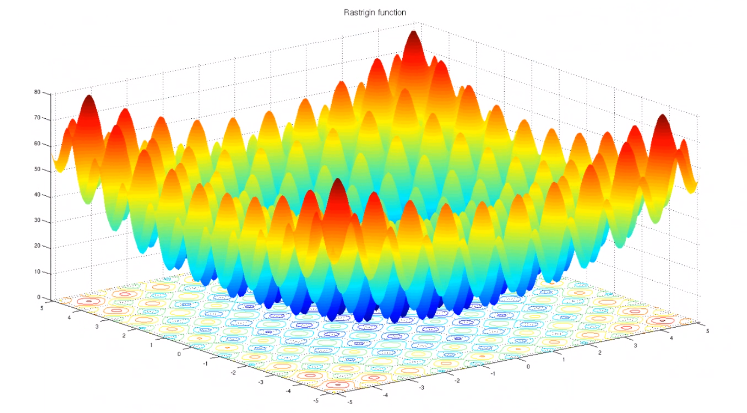